In [1]:
import numpy
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

In [11]:
def read_site_wv2(csv_filename1, csv_filename2):
    csv_data1 = numpy.genfromtxt(csv_filename1, delimiter=',', dtype=str)
    wv_day1 = csv_data1[:, 1]
    wv_day1 = wv_day1.astype(float)
    csv_data2 = numpy.genfromtxt(csv_filename2, delimiter=',', dtype=str)
    wv_day2 = csv_data2[:, 1]
    wv_day2 = wv_day2.astype(float)
    
    nan_mask1 = numpy.isnan(wv_day1)
    nan_mask2 = numpy.isnan(wv_day2)

    wv_combined = numpy.copy(wv_day1)

    # Set NaN where both arrays have NaN
    wv_combined[nan_mask1 & nan_mask2] = numpy.NaN
    # Set NaN where only wv_day1 has NaN
    wv_combined[nan_mask1 & ~nan_mask2] = wv_day2[nan_mask1 & ~nan_mask2]
    # Set NaN where only wv_day2 has NaN
    wv_combined[~nan_mask1 & nan_mask2] = wv_day1[~nan_mask1 & nan_mask2]
    # Calculate average where both arrays have values
    wv_combined[~nan_mask1 & ~nan_mask2] = (wv_day1[~nan_mask1 & ~nan_mask2] + wv_day2[~nan_mask1 & ~nan_mask2]) / 2
    
    valid_indices = numpy.where(~numpy.isnan(wv_combined))[0]
    valid_values = wv_combined[valid_indices]
    interpolator = interp1d(valid_indices, valid_values, kind='nearest', fill_value='extrapolate')
    wv_day_imp = interpolator(numpy.arange(len(wv_combined)))
    
    csv_data1[:, 1] = wv_day_imp
    return csv_data1

Text(0, 0.5, 'Atmospheric total column water vapor (cm)')

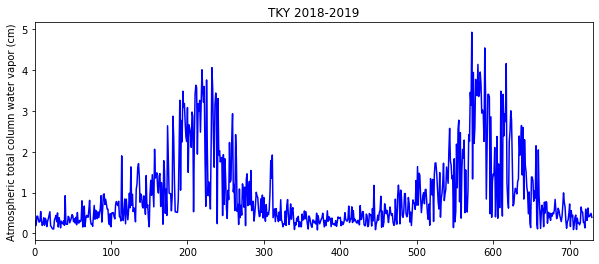

In [12]:
# demo
csv1_path = '/disk2/Data/FluxSite4ET/original/TKY_MOD05_TPWV.csv'
csv2_path = '/disk2/Data/FluxSite4ET/original/TKY_MYD05_TPWV.csv'
csv_data_imp = read_site_wv2(csv1_path, csv2_path)
plt.figure(figsize=(10,4))
plt.plot(numpy.arange(365*2), csv_data_imp[:,1].astype(float), color='blue')
plt.title('TKY 2018-2019')
plt.xlim(0, 365*2)
plt.ylabel('Atmospheric total column water vapor (cm)')

In [13]:
SITE_DATA_FOLDER = '/disk2/Data/FluxSite4ET'
for site_name in ['TKY','CRK', 'GCK', 'GDK']:
    site_csv1 = SITE_DATA_FOLDER + '/original/' + site_name + '_MOD05_TPWV.csv'
    site_csv2 = SITE_DATA_FOLDER + '/original/' + site_name + '_MYD05_TPWV.csv'
    csv_data_imp = read_site_wv2(site_csv1, site_csv2)
    numpy.savetxt(SITE_DATA_FOLDER+'/' + site_name + '_MODIS05_TPWV.csv', csv_data_imp, delimiter=",", fmt='%s')